### Description:

This notebook tries to read given data in a convenient way, and compares the calculated "JND" with groundtruth.

Flow:
> 1. Read CSV file, and find the folder with the corresponding defect type.

> 2. Select the image with the corresponding filename

> 3. Find the defect bounded in .bmp file

> 4. Get the JND of that defect

Update: Finds the coordinates of the b.box.

In [1]:
import os
import cv2
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tifffile as tiff
from matplotlib.pyplot import figure

basePath = "/home/cov/Desktop/PML/project1_Mura/AUO_Data/2nd/0826_2nd/"
csvPath = basePath + "table2.csv"

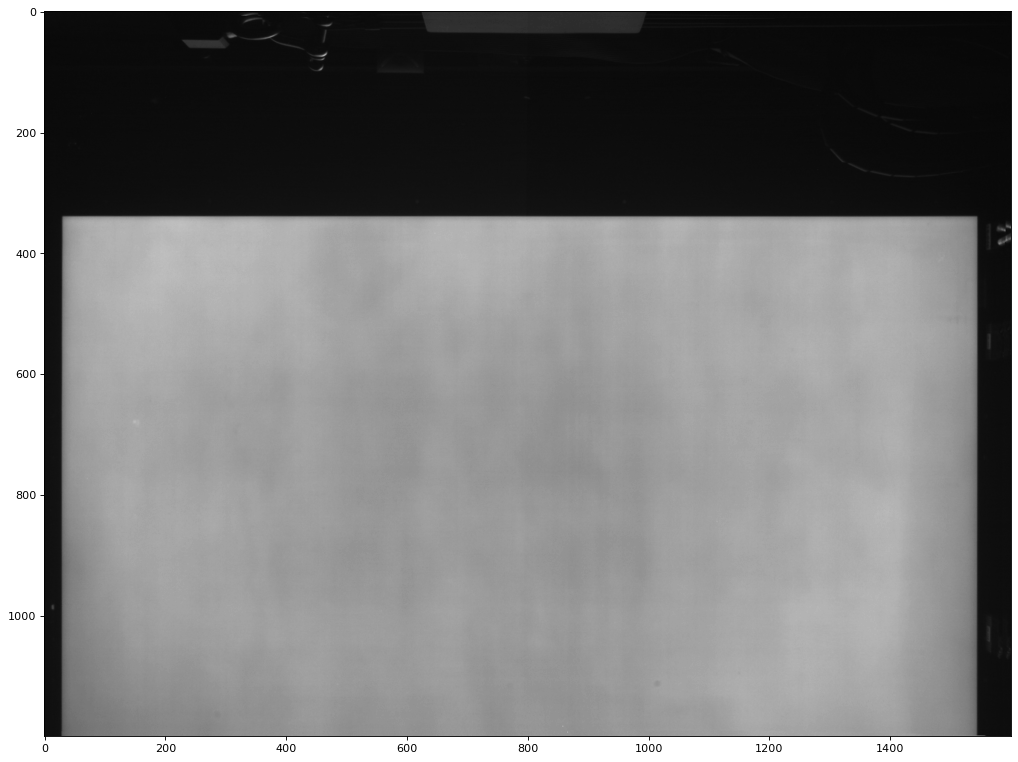

/home/cov/Desktop/PML/project1_Mura/AUO_Data/2nd/0826_2nd/WSL128/C5AR71B/C5AR71B_C3_1_PM_L128_FMura.tif


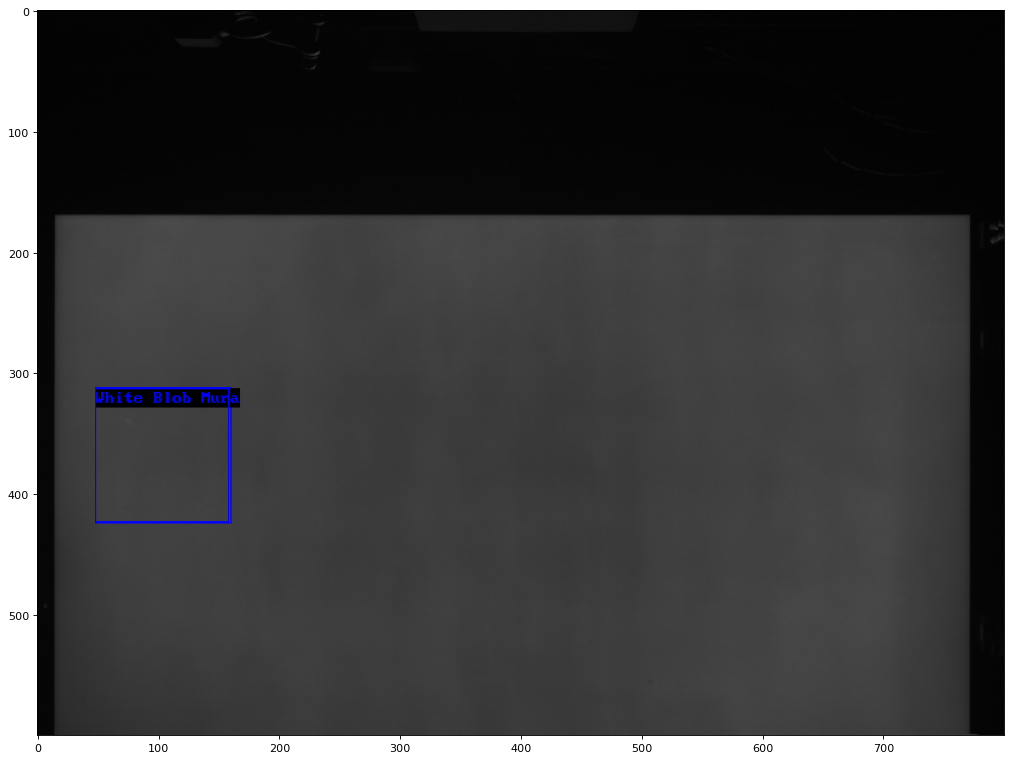

/home/cov/Desktop/PML/project1_Mura/AUO_Data/2nd/0826_2nd/WSL128/C5AR71B/C5AR71B_C1_PM_LM_FMura_S1_WithDefect.bmp


In [40]:
lst = pd.read_csv(csvPath)
RealJND = []
n = 15
for i in range(n,n+1,1):
    imgPath = basePath + lst.Deftype[i] +'/'+ lst.Chip_ID[i] +'/'
    RealJND.append(lst.RealJND[i])
    if lst.Deftype[i] == 'WSL128':
        for file_name in os.listdir(imgPath):
            if ("L128" in file_name) and (".tif" in file_name):
                fname = imgPath + file_name
                img1 = tiff.imread(fname)
                figure(figsize=(16, 12), dpi=80)
                plt.imshow(img1, cmap='gray')
                plt.show()
                print(fname)
            if ".bmp" in file_name:
                fname = imgPath + file_name
                img2 = cv2.imread(fname)
                figure(figsize=(16, 12), dpi=80)
                plt.imshow(img2, cmap='gray')
                plt.show()
                print(fname)
    print("===============")
#     elif lst.Deftype[i] == 'WSL48':
#         for file_name in os.listdir(imgPath):
#             if ("L48" in file_name) and (".tif" in file_name):
#                 fname = imgPath + file_name
#                 img = tiff.imread(fname)
#                 plt.imshow(img, cmap='gray')
#                 plt.show()
#             if ".bmp" in file_name:
#                 fname = imgPath + file_name
#                 img = cv2.imread(fname)
#                 plt.imshow(img, cmap='gray')
#                 plt.show()
                
#     elif lst.Deftype[i] == 'DWL48':
#         for file_name in os.listdir(imgPath):
#             if ("L48" in file_name) and (".tif" in file_name):
#                 fname = imgPath + file_name
#                 img = tiff.imread(fname)
#                 plt.imshow(img, cmap='gray')
#                 plt.show()
#             if ".bmp" in file_name:
#                 fname = imgPath + file_name
#                 img = cv2.imread(fname)
#                 plt.imshow(img, cmap='gray')
#                 plt.show()
                
#     elif lst.Deftype[i] == 'BSL48':
#         for file_name in os.listdir(imgPath):
#             if ("L48" in file_name) and (".tif" in file_name):
#                 fname = imgPath + file_name
#                 img = tiff.imread(fname)
#                 plt.imshow(img, cmap='gray')
#                 plt.show()
#             if ".bmp" in file_name:
#                 fname = imgPath + file_name
#                 img = cv2.imread(fname)
#                 plt.imshow(img, cmap='gray')
#                 plt.show()
                
#     elif lst.Deftype[i] == 'BSL128':
#         for file_name in os.listdir(imgPath):
#             if ("L128" in file_name) and (".tif" in file_name):
#                 fname = imgPath + file_name
#                 img = tiff.imread(fname)
#                 plt.imshow(img, cmap='gray')
#                 plt.show()
#             if ".bmp" in file_name:
#                 fname = imgPath + file_name
#                 img = cv2.imread(fname)
#                 plt.imshow(img, cmap='gray')
#                 plt.show()
                
#     elif lst.Deftype[i] == 'IRR':
#         for file_name in os.listdir(imgPath):
#             if ("L128" in file_name) and (".tif" in file_name):
#                 fname = imgPath + file_name
#                 img = tiff.imread(fname)
#                 plt.imshow(img, cmap='gray')
#                 plt.show()
#             if ".bmp" in file_name:
#                 fname = imgPath + file_name
#                 img = cv2.imread(fname)
#                 plt.imshow(img, cmap='gray')
#                 plt.show()


In [27]:

indices = np.where(np.all(img2 == [0,0,255], axis=-1))
#print(indices)
coords = zip(indices[0], indices[1])
a = list(coords)[0]
coords = zip(indices[0], indices[1])
b = list(coords)[-1]
print(a,b)

(499, 660) (599, 776)


Ref: https://stackoverflow.com/questions/12138339/finding-the-x-y-indexes-of-specific-r-g-b-color-values-from-images-stored-in

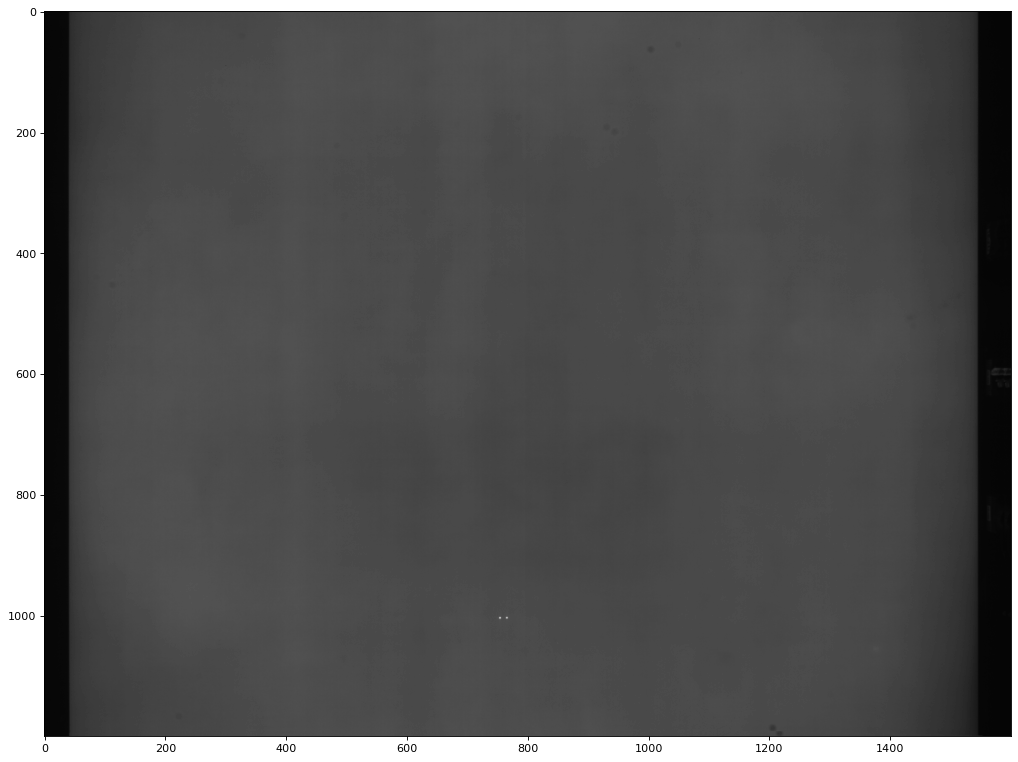

In [28]:
imgFloat = img1.astype('float')
coeff = cv2.dct(imgFloat)
coeff[:,3:]=0
coeff[3:][:]=0
reconsImg = cv2.idct(coeff)
diff = reconsImg-img1
figure(figsize=(16, 12), dpi=80)
plt.imshow(imgFloat, cmap='gray')
img1.shape
img1 = img1[2*a[0]:2*b[0],2*a[1]:2*b[1]]
diff = diff[2*a[0]:2*b[0],2*a[1]:2*b[1]]

0


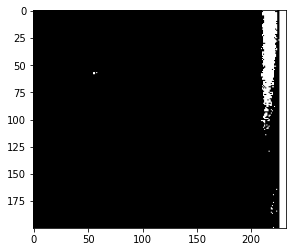

In [29]:
diff_n = cv2.normalize(diff, None, alpha = 0, beta = 255, norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_8UC1)
thresh1 = cv2.adaptiveThreshold(diff_n, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 45, 22)# obtain white Mura
thresh2 = cv2.adaptiveThreshold(diff_n, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 45,-22)# obtain black Mura
BothT = thresh1+thresh2
plt.imshow(BothT, cmap='gray')#, vmin=0, vmax=255)
print(BothT[20,20])

C5A23GA threshold value: (45,+/-22)
others': (15,+/-2)

C5A97CC median blur kernel: 17
others': 9

(200, 232)

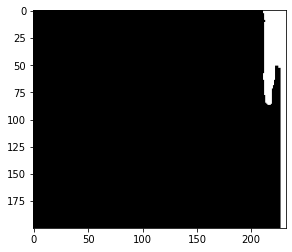

In [30]:
BothT2 = cv2.medianBlur(BothT, 9)
kernel = np.ones((2,2),np.uint8)
opening = cv2.morphologyEx(BothT2, cv2.MORPH_OPEN, kernel)
plt.imshow(opening, cmap='gray')#, vmin=0, vmax=255)
opening.shape
#cv2.imwrite('o.png',opening)

223 63
No.0 defect:


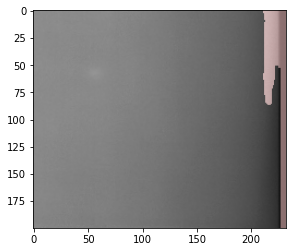

In [31]:
color = (255,200,200)#(200,200,200)
lst_dfcts = []
lst_bdbox = []
bdRect = []

_, opening2 = cv2.threshold(opening, 127, 255, cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(opening2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
for i in range(len(contours)):
    cimg,cimg2 = np.zeros_like(opening), np.zeros_like(opening)
    cv2.drawContours(cimg, contours, i, color, -1, cv2.LINE_8)
    pts = np.where(cimg == 255)
    lst_dfcts.append(img1[pts[0], pts[1]]) # record the intensity at the defect pixels
    bdRect.append(cv2.boundingRect(contours[i]))
    cv2.rectangle(cimg2, (int(bdRect[i][0]), int(bdRect[i][1])),\
                  (int(bdRect[i][0]+bdRect[i][2]), int(bdRect[i][1]+bdRect[i][3])), 255, -1)
    pts2 = np.where(cimg2 == 255)
    lst_bdbox.append(img1[pts2[0], pts2[1]])
    
    M = cv2.moments(contours[i])
    if M["m00"]!=0:
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
        print(cX,cY)

for j in range(len(lst_dfcts)):
    drawing2 = np.zeros((opening.shape[0], opening.shape[1], 3), dtype=np.uint8)
    cv2.drawContours(drawing2, contours, j, color, -1, cv2.LINE_8)#, hierarchy, 0) # -1 doesn't count the boundary

    for i in range(3): # overlay
        drawing2[:,:,i] = (drawing2[:,:,i] + img1)/2
    
    print("No.{} defect:".format(j))
    plt.imshow(drawing2,cmap='gray')#, vmin=0, vmax=255)
    plt.show()

---

"JND" calculation (basically, it's contrast) below

In [34]:
total_pixel_count = img1.shape[0]*img1.shape[1]
defect_pixel_count = 0 #S_total
for i in range(len(lst_dfcts)):
    defect_pixel_count += len(lst_dfcts[i])
    
defect_intens = 0
for i in range(len(lst_dfcts)):
    defect_intens += sum(lst_dfcts[i])
total_intens = cv2.sumElems(img1)[0] - defect_intens

I_Back = total_intens/(total_pixel_count-defect_pixel_count)

Contrast = abs(img1[cY,cX]-I_Back)/(img1[cY,cX]+I_Back) # (cY,cX) or (cX,cY) ?
print(str(Contrast)+", "+str(RealJND[0]))

0.36451761842490327, 2.8


{'m00': 598401.0, 'm10': 298901299.5, 'm01': 179221099.5, 'm20': 199068265467.0, 'm11': 89520939200.25, 'm02': 71568959067.0, 'm30': 149151897901149.75, 'm21': 59620945507366.5, 'm12': 35748695053966.5, 'm03': 32152354860849.75, 'mu20': 49767066366.75, 'mu11': 0.0, 'mu02': 17892239766.75, 'mu30': 0.0, 'mu21': 0.0, 'mu12': 0.0, 'mu03': 0.0, 'nu20': 0.13898163606010017, 'nu11': 0.0, 'nu02': 0.04996663329996663, 'nu30': 0.0, 'nu21': 0.0, 'nu12': 0.0, 'nu03': 0.0}


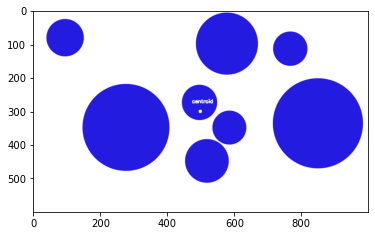

{'m00': 13441.0, 'm10': 6971033.5, 'm01': 6008099.0, 'm20': 3629860401.6666665, 'm11': 3116039108.4166665, 'm02': 2699954901.5, 'm30': 1897532917614.75, 'm21': 1622541687539.0833, 'm12': 1400304954657.0833, 'm03': 1219700589415.5, 'mu20': 14407082.856886864, 'mu11': 1655.8226256370544, 'mu02': 14347164.441670895, 'mu30': -225366.2080078125, 'mu21': -67909.40179157257, 'mu12': 218139.09914684296, 'mu03': 67697.10668945312, 'nu20': 0.07974673142205829, 'nu11': 9.165383688074286e-06, 'nu02': 0.07941506832183678, 'nu30': -1.0759939876452775e-05, 'nu21': -3.2422832454893364e-06, 'nu12': 1.0414887006672423e-05, 'nu03': 3.232147375719582e-06}


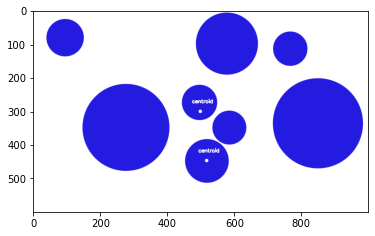

{'m00': 8135.0, 'm10': 4764750.333333333, 'm01': 2826912.5, 'm20': 2796030833.5, 'm11': 1655750740.8333333, 'm02': 987616229.6666666, 'm30': 1643835665147.1, 'm21': 971620714641.25, 'm12': 578456484460.1167, 'm03': 346855214271.25, 'mu20': 5269218.3801345825, 'mu11': 2.384185791015625e-07, 'mu02': 5264135.916666746, 'mu30': 156112.59423828125, 'mu21': -0.00020956993103027344, 'mu12': -154692.88386631012, 'mu03': 0.0, 'nu20': 0.0796216335529486, 'nu11': 3.602674128862817e-15, 'nu02': 0.07954483391881159, 'nu30': 2.6154357009100326e-05, 'nu21': -3.5110343411321236e-14, 'nu12': -2.5916505526974672e-05, 'nu03': 0.0}


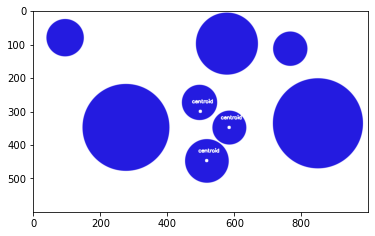

{'m00': 8797.0, 'm10': 4368625.833333333, 'm01': 2396139.1666666665, 'm20': 2175633517.6666665, 'm11': 1189927950.4166665, 'm02': 658824927.3333333, 'm30': 1086542842628.8501, 'm21': 592597674483.3, 'm12': 327172692646.7, 'm03': 182808030512.65002, 'mu20': 6156233.175662994, 'mu11': -4465.607183218002, 'mu02': 6161189.009583354, 'mu30': 4420.492431640625, 'mu21': 8590.374017715454, 'mu12': -2221.9832396507263, 'mu03': -11428.684326171875, 'nu20': 0.079551042804283, 'nu11': -5.770471943519765e-05, 'nu02': 0.07961508224935925, 'nu30': 6.090236691501838e-07, 'nu21': 1.1835199775921253e-06, 'nu12': -3.061288773432092e-07, 'nu03': -1.5745619678170392e-06}


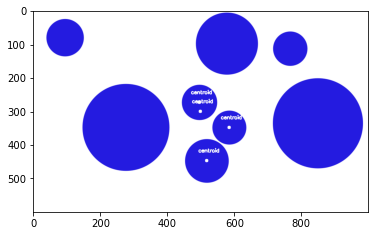

{'m00': 53117.0, 'm10': 14715468.5, 'm01': 18429159.0, 'm20': 4301285780.666666, 'm11': 5105575684.083333, 'm02': 6618587768.5, 'm30': 1316028157833.25, 'm21': 1492337690407.5833, 'm12': 1833596438813.9167, 'm03': 2452141597605.5, 'mu20': 224530444.8138833, 'mu11': -15910.81079673767, 'mu02': 224516163.41535664, 'mu30': -2054543.1569824219, 'mu21': -2074380.9953155518, 'mu12': 2045754.7634429932, 'mu03': 2085049.3530273438, 'nu20': 0.07958077417988134, 'nu11': -5.639300461385388e-06, 'nu02': 0.07957571239526649, 'nu30': -3.159595030544209e-06, 'nu21': -3.190102803136417e-06, 'nu12': 3.1460797317979763e-06, 'nu03': 3.2065092192760288e-06}


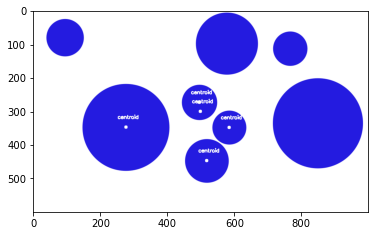

{'m00': 57033.0, 'm10': 48480601.5, 'm01': 19088673.0, 'm20': 41469641651.666664, 'm11': 16226202047.25, 'm02': 6647624888.5, 'm30': 35691310076028.75, 'm21': 13879652553582.084, 'm12': 5650760760162.417, 'm03': 2398122389522.5, 'mu20': 258961487.5195465, 'mu11': -23977.62699317932, 'mu02': 258737105.97183132, 'mu30': 1734843.5, 'mu21': 2105310.2676086426, 'mu12': -1741173.44921875, 'mu03': -2095266.36328125, 'nu20': 0.07961277241348656, 'nu11': -7.371464301923934e-06, 'nu02': 0.07954379058432293, 'nu30': 2.2332881515624796e-06, 'nu21': 2.7101951709264926e-06, 'nu12': -2.2414367831769316e-06, 'nu03': -2.697265513277377e-06}


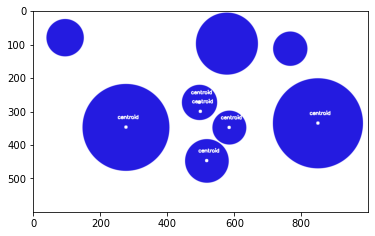

{'m00': 8334.0, 'm10': 6396247.0, 'm01': 933307.0, 'm20': 4914582017.333333, 'm11': 716302146.5, 'm02': 110036385.33333333, 'm30': 3780384043312.5, 'm21': 550373680111.5, 'm12': 84451671332.33333, 'm03': 13558428799.5, 'mu20': 5537658.680945396, 'mu11': -1.1876649856567383, 'mu02': 5517312.109311253, 'mu30': -39969.51611328125, 'mu21': 55962.45708441734, 'mu12': 39779.38573551178, 'mu03': -57007.06434440613, 'nu20': 0.07972952777090139, 'nu11': -1.709963974166067e-08, 'nu02': 0.07943658401224594, 'nu30': -6.303694394765088e-06, 'nu21': 8.825981931842886e-06, 'nu12': 6.273708447644209e-06, 'nu03': -8.990729608818994e-06}


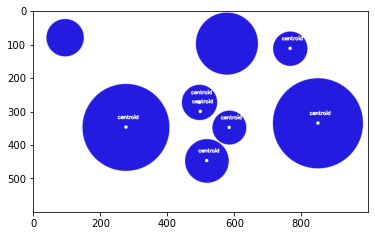

{'m00': 9867.5, 'm10': 941058.1666666666, 'm01': 781170.8333333333, 'm20': 97490712.25, 'm11': 74504998.375, 'm02': 69597165.91666666, 'm30': 10774223588.050001, 'm21': 7719202638.483334, 'm12': 6638469565.683333, 'm03': 6737323096.450001, 'mu20': 7742501.147894338, 'mu11': 5156.239693313837, 'mu02': 7754969.732152417, 'mu30': -209531.61724472046, 'mu21': 266172.96136057377, 'mu12': 208894.70787632465, 'mu03': -268840.01225471497, 'nu20': 0.07951828561882324, 'nu11': 5.295644557489689e-05, 'nu02': 0.0796463424864113, 'nu30': -2.1663654829917394e-05, 'nu21': 2.751985230581091e-05, 'nu12': 2.1597804220370708e-05, 'nu03': -2.7795601000658315e-05}


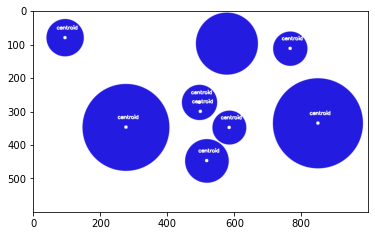

{'m00': 27107.0, 'm10': 15678990.666666666, 'm01': 2624650.0, 'm20': 9127344327.166666, 'm11': 1518120465.6666665, 'm02': 312639518.1666666, 'm30': 5346964754251.4, 'm21': 883752272097.3334, 'm12': 180832249304.46667, 'm03': 41601817038.0, 'mu20': 58441522.5250473, 'mu11': -6322.737312555313, 'mu02': 58506356.16054276, 'mu30': 697383.0234375, 'mu21': -486231.4881916046, 'mu12': -705187.7808532715, 'mu03': 506426.3617324829, 'nu20': 0.07953505947122995, 'nu11': -8.60482866372148e-06, 'nu02': 0.07962329377506173, 'nu30': 5.76458080912586e-06, 'nu21': -4.019198362194188e-06, 'nu12': -5.829095076475058e-06, 'nu03': 4.186129555733493e-06}


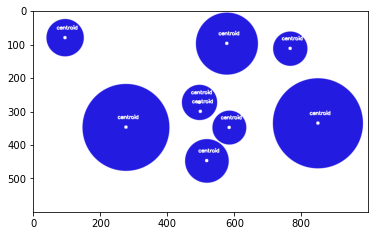

In [17]:
img = cv2.imread("test.png")

gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

ret,thresh = cv2.threshold(gray_image,127,255,0)

# find contours in the binary image
contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
for c in contours:    
    M = cv2.moments(c)
    print(M)
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])
    cv2.circle(img, (cX, cY), 5, (255, 255, 255), -1)
    cv2.putText(img, "centroid", (cX - 25, cY - 25),cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)
    plt.imshow(img)
    plt.show()

In [35]:
img1.shape

(200, 232)

In [38]:
img1[199,231]

24